In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

2D Burgers' equation 
$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y}  = \nu\frac{\partial^2 u}{\partial x^2} + \nu\frac{\partial^2 u }{\partial y^2}$$
$$ \frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y}  = \nu\frac{\partial^2 v}{\partial x^2} + \nu\frac{\partial^2 v }{\partial y^2}$$
Given a the same second order derivative, central spatial first order, and forward difference in time we get the following equations:
$$u_{ij}^{n+1} = u_{ij}^{n} - u_{ij}^{n}\frac{\Delta t}{\Delta x}(u_{ij}^n - u_{i-1,j}^n) - v_{ij}^n\frac{\Delta t}{\Delta y} (u_{ij}^n - u_{i,j-1}^n) + \frac{\nu\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}) + \frac{\nu\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}) $$
$$v_{ij}^{n+1} = v_{ij}^{n} - u_{ij}^{n}\frac{\Delta t}{\Delta x}(v_{ij}^n - v_{i-1,j}^n) - v_{ij}^n\frac{\Delta t}{\Delta y} (v_{ij}^n - v_{i,j-1}^n) + \frac{\nu\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}) + \frac{\nu\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}) $$

In [11]:
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx,nt))
v = np.ones((ny,nx,nt))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1),0] = 2 
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1),0] = 2 

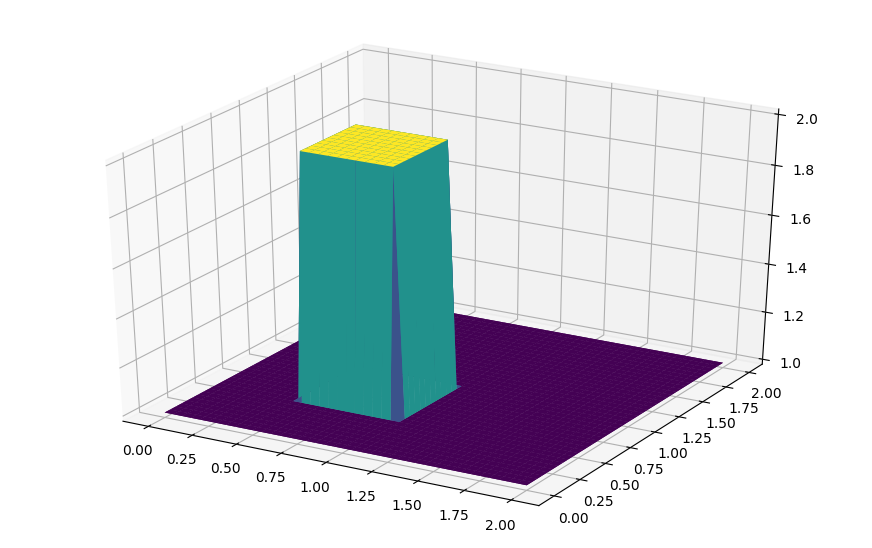

In [12]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:,:,0], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:,:,0], cmap=cm.viridis, rstride=1, cstride=1)

In [13]:
for n in range(nt - 1):
  un = u[:,:,n].copy()
  vn = v[:,:,n].copy()

  u[1:-1,1:-1,n+1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                     nu * dt / dy**2 * 
                     (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
  
  v[1:-1,1:-1,n+1] = ((vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                     nu * dt / dx**2 * 
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
  
  u[0, :,n] = 1
  u[-1, :,n] = 1
  u[:, 0,n] = 1
  u[:, -1,n] = 1
    
  v[0, :,n] = 1
  v[-1, :,n] = 1
  v[:, 0,n] = 1
  v[:, -1,n] = 1

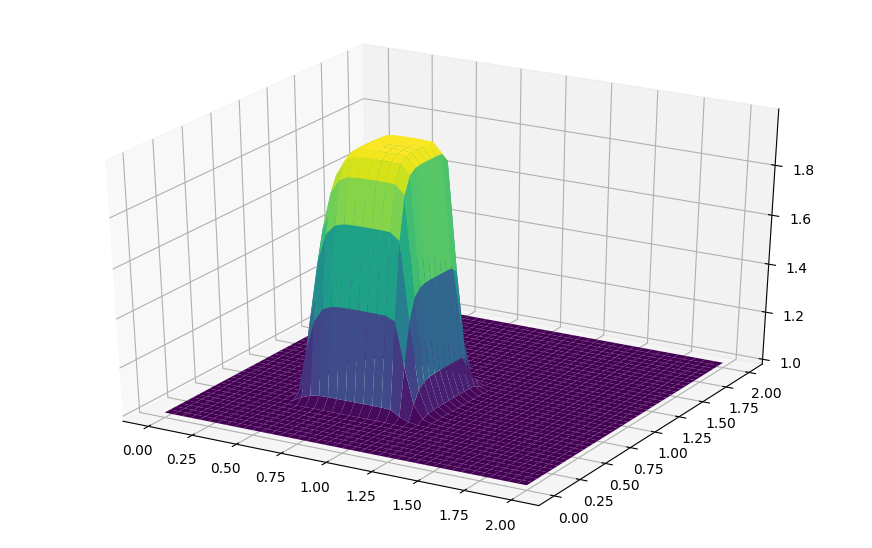

In [14]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:,:,-1], cmap=cm.viridis, rstride=1, cstride=1)